In [1]:
from rasterio.plot import show
import random
import glob
import warnings
import numpy as np
import pandas as pd
import matplotlib
import datetime
import os
import rasterio
import sys
#utilsPath = os.path.join(Path(os.getcwd()).parent.absolute(),'utils')
utilsPath = os.path.join(os.getcwd(),'utils')
if utilsPath not in sys.path:
    sys.path.append(utilsPath)

from lossFunctions import iou_coef, DiceLoss, weighted_categorical_crossentropy
from getTiles import image_gen
from getTiles import read_image
from getTiles import read_satellite

import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.image as mpimg
import keras
from keras import backend as K

import tensorflow as tf

In [11]:
# labelFilePath = 'inputs/labeledTilesValidYears/plot_{}_{}.tif'
# bandFilePath = 'inputs/landsatTiles30pPostYear/Landsat7_{}_{}.tif'

# #fileNames = glob.glob('inputs/labeledTilesValidYears/*.tif')
# fileNames = glob.glob('inputs/landsatTiles30pPostYear/*.tif')
# fileNames.sort()
# plotIDYears = [[int(x.split('_')[1]),int(x.split('_')[2].split('.')[0])] for x in fileNames]


In [12]:
# classnames = ['No Loss','Hard commodities', 'Forest products', 'Other disturbances',
#                 'Soft commodities', 'Settlements/infrastructure', 'Fires','Hansen Mistake']
# classcolors = ['#ffffff','#FCABAB','#93D896','#C5E4FC','#FBFD38','#BABABA','#FC3B26','#3540c8']


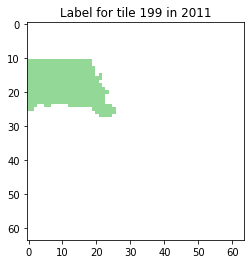

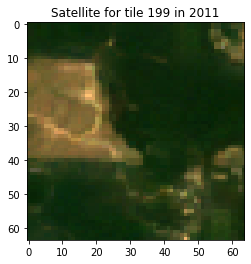

In [4]:
# def NormalizeData(data):
#     return (data - np.min(data)) / (np.max(data) - np.min(data))


# # plotIDYears = [[119, 2001],
# # [23, 2006],
# # [439, 2018],
# # [51, 2016],
# # [163, 2001],
# # [379, 2003],
# # [283, 2012],
# # [439, 2010],
# # [363, 2010],
# # [199, 2011],
# # [71, 2019]]
# #plotIDYears = [[391, 2012],[255, 2014],[63, 2001]]
# # plotIDYears = [[79, 2013],
# # [79, 2017],
# # [63, 2017],
# # [391, 2012],
# # [11, 2002],
# # [211, 2004],
# # [23, 2007],
# # [395, 2004]]

# #plotIDYears = [[199,2011]]


# for idy in plotIDYears:
#     validationID = idy#validationPlots[idy]
#     validationXRaw, label = read_image(validationID, labelFilePath, bandFilePath)
#     #label = np.argmax(label, axis=-1)
#     #print(label.shape)
    
#     X = np.zeros((64,64,3))
#     X[:,:,0] = validationXRaw[:,:,3]
#     X[:,:,1] = validationXRaw[:,:,2]
#     X[:,:,2] = validationXRaw[:,:,1]
#     X = NormalizeData(X)
# #     validationX = np.zeros((1, image_size, image_size, n_features))
# #     validationX[0,:,:,:] = validationXRaw

#     cmap = colors.ListedColormap(classcolors)
#     bounds=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
#     norm = colors.BoundaryNorm(bounds, cmap.N)
    
#     fig1, (ax1) = plt.subplots(nrows=1, ncols=1) # two axes on figure
#     ax1.imshow(label[0],cmap=cmap, norm=norm)#,vmin=0, vmax=num_classes,cmap='tab10')
#     ax1.set_title('Label for tile {} in {}'.format(idy[0],idy[1]))
#     ax1.set_aspect('equal', adjustable='box')
# #     cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax1,orientation='horizontal')
# #     cbar.set_ticks([0,1,2,3,4,5,6,7])

# #     cbar.set_ticklabels(classnames)
#     plt.show()
    
#     fig2, (ax2) = plt.subplots(nrows=1, ncols=1) 
#     ax2.imshow(X, interpolation='none', aspect='auto')#vmin=0, vmax=num_classes,cmap='tab10')
#     ax2.set_title('Satellite for tile {} in {}'.format(idy[0],idy[1]))
#     ax2.set_aspect('equal', adjustable='box')

#     plt.show()
    
    
#     fig1.savefig('/Users/kristine/Desktop/PosterViz/{}_{}_Label.png'.format(idy[0],idy[1]).format(idy), dpi=800)
#     fig2.savefig('/Users/kristine/Desktop/PosterViz/{}_{}_Landsat.png'.format(idy[0],idy[1]).format(idy), dpi=800)
    
    
    
    
    

In [5]:

# def iou_coef(y_true, y_pred, smooth=1):
#     y_true = tf.cast(y_true, dtype=tf.float32)
#     intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
#     union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
#     iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
#     return 1 - iou

# #Keras
# def DiceLoss(targets, inputs, smooth=1e-6):
    
#     #flatten label and prediction tensors
#     targets = tf.cast(targets, dtype=tf.float32)
#     inputs = K.flatten(inputs)
#     targets = K.flatten(targets)
    
#     intersection = K.sum(K.dot(targets, inputs))
#     dice = (2*intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)
#     return 1 - dice


# def weighted_categorical_crossentropy(weights):
#     #https://gist.github.com/wassname/ce364fddfc8a025bfab4348cf5de852d
#     """
#     A weighted version of keras.objectives.categorical_crossentropy
    
#     Variables:
#         weights: numpy array of shape (C,) where C is the number of classes
    
#     Usage:
#         weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
#         loss = weighted_categorical_crossentropy(weights)
#         model.compile(loss=loss,optimizer='adam')
#     """
#     weights = K.variable(weights)

#     def loss(y_true, y_pred):
#         # scale predictions so that the class probas of each sample sum to 1
#         y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
#         # clip to prevent NaN's and Inf's
#         y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
#         # calc
#         loss = y_true * K.log(y_pred) * weights
#         loss = -K.sum(loss, -1)
#         return loss

#     return loss


2021-12-09 10:20:08.381762: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


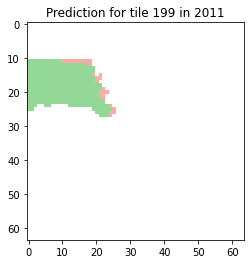

In [6]:
# class_weights = np.array([2, 80, 60, 100,
#                           100, 90, 100,100]).astype(float)



# model = keras.models.load_model('unetModels/models/{}'.format('unet2'), custom_objects = {"loss":weighted_categorical_crossentropy(class_weights),"iou_coef": iou_coef, "weighted_categorical_crossentropy": weighted_categorical_crossentropy(class_weights)})


# #ids = plotIDYears#[[155, 2004],[127, 2020],[11, 2018]]

# # plotIDYears = [[119, 2001],
# # [23, 2006],
# # [439, 2018],
# # [51, 2016],
# # [163, 2001],
# # [379, 2003],
# # [283, 2012],
# # [439, 2010],
# # [363, 2010],
# # [199, 2011],
# # [71, 2019]]
# #plotIDYears = [[391, 2012],[255, 2014],[63, 2001]]
# # plotIDYears = [[79, 2013],
# # [79, 2017],
# # [63, 2017],
# # [391, 2012],
# # [11, 2002],
# # [211, 2004],
# # [23, 2007],
# # [395, 2004]]
# #plotIDYears = [[199,2011]]
# for idy in plotIDYears:
#     validationID = idy#validationPlots[idy]
#     validationXRaw, label = read_image(validationID, labelFilePath, bandFilePath)
#     validationX = np.zeros((1, 64, 64, 4))
#     validationX[0,:,:,:] = validationXRaw
    
#     ynew = model.predict(validationX)
#     ynew = ynew[0]
#     label = label[0]
#     #ynew = np.argmax(ynew, axis=-1)

# # #     ##Code block to filter to only loss
#     ynew[:,:,0] = 0
#     ynew = np.argmax(ynew,axis=-1)
#     ynew = np.where(label==0, 0, ynew) 


#     cmap = colors.ListedColormap(classcolors)
#     bounds=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
#     norm = colors.BoundaryNorm(bounds, cmap.N)
    
#     fig3, (ax3) = plt.subplots(nrows=1, ncols=1) # two axes on figure
#     ax3.imshow(ynew,cmap=cmap, norm=norm)#,vmin=0, vmax=num_classes,cmap='tab10')
#     ax3.set_title('Prediction for tile {} in {}'.format(idy[0],idy[1]))
#     ax3.set_aspect('equal', adjustable='box')

#     plt.show()

    
    
#     fig3.savefig('/Users/kristine/Desktop/PosterViz/{}_{}_Prediction.png'.format(idy[0],idy[1]), dpi=800)

    

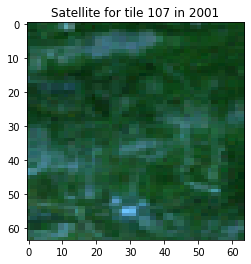

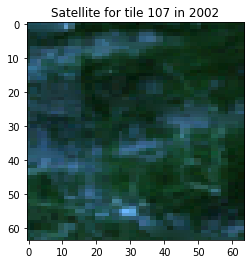

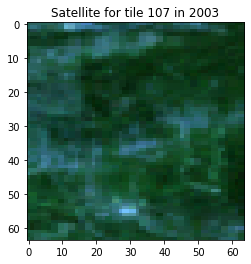

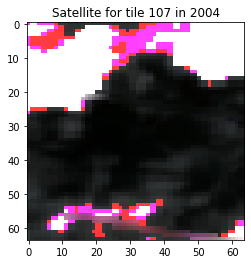

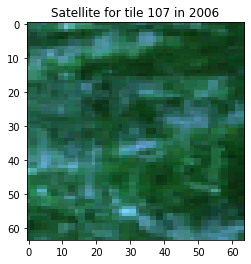

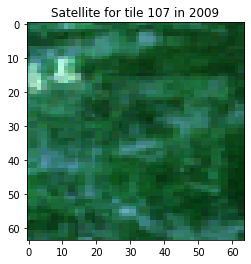

KeyboardInterrupt: 

In [18]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


# plotIDYears = [[23, 2007],
# [23, 2008],
# [23, 2009],
# [23, 2010],
# # [23, 2011]]
# plotIDYears = [[199, 2011],
# [199, 2012],
# [199, 2013],
# [199, 2014],
# [199, 2015]]
for idy in plotIDYears:
    validationID = idy#validationPlots[idy]
    validationXRaw = read_satellite(validationID, bandFilePath)

    X = np.zeros((64,64,3))
    X[:,:,0] = validationXRaw[:,:,3]
    X[:,:,1] = validationXRaw[:,:,2]
    X[:,:,2] = validationXRaw[:,:,1]
    X = NormalizeData(X)

    fig2, (ax2) = plt.subplots(nrows=1, ncols=1) 
    ax2.imshow(X, interpolation='none', aspect='auto')#vmin=0, vmax=num_classes,cmap='tab10')
    ax2.set_title('Satellite for tile {} in {}'.format(idy[0],idy[1]))
    ax2.set_aspect('equal', adjustable='box')

    plt.show()
    
    
    fig2.savefig('/Users/kristine/Desktop/LandsatViz/{}_{}_Landsat.png'.format(idy[0],idy[1]).format(idy), dpi=800)
    
    
    
    
    

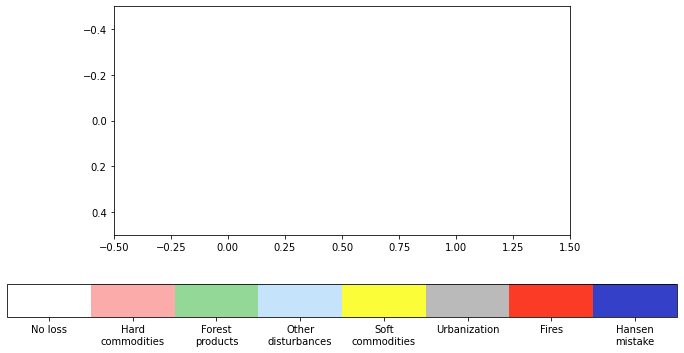

In [2]:
classnames = ['No loss','Hard\ncommodities', 'Forest\nproducts', 'Other\ndisturbances',
                'Soft\ncommodities', 'Urbanization', 'Fires','Hansen\nmistake']
classcolors = ['#ffffff','#FCABAB','#93D896','#C5E4FC','#FBFD38','#BABABA','#FC3B26','#3540c8']

cmap = colors.ListedColormap(classcolors)
bounds=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig4 = plt.figure(figsize=(12, 6))
#fig4, (ax4) = plt.subplots(nrows=1, ncols=1) # two axes on figure
img = plt.imshow(np.array([[0,1]]), cmap="Oranges")
img.set_visible(False)
#ax1.imshow(label[0],cmap=cmap, norm=norm)#,vmin=0, vmax=num_classes,cmap='tab10')
#ax4.set_title('Legend')
cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),orientation='horizontal')
cbar.set_ticks([0,1,2,3,4,5,6,7])

cbar.set_ticklabels(classnames)
plt.show()
fig4.savefig('/Users/kristine/Desktop/Legend.png', dpi=500)



478 215


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


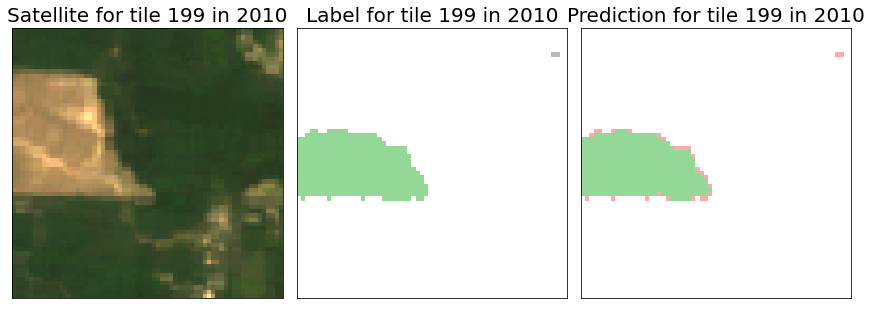

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


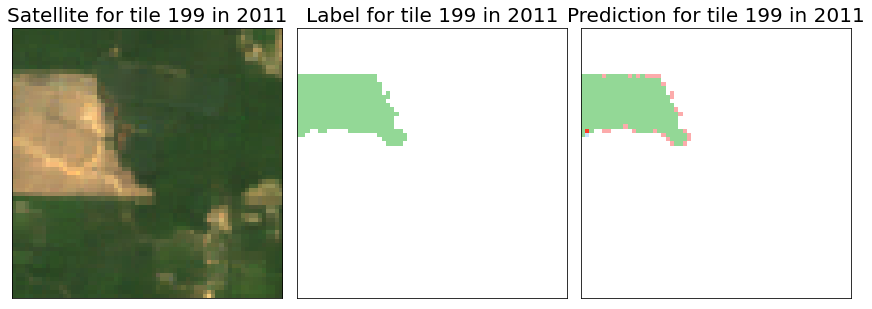

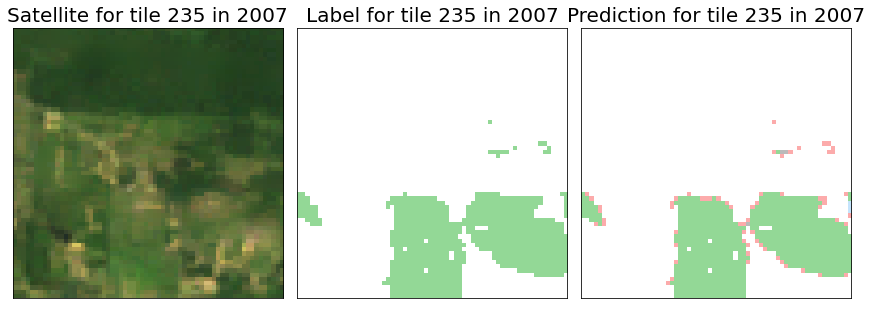

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


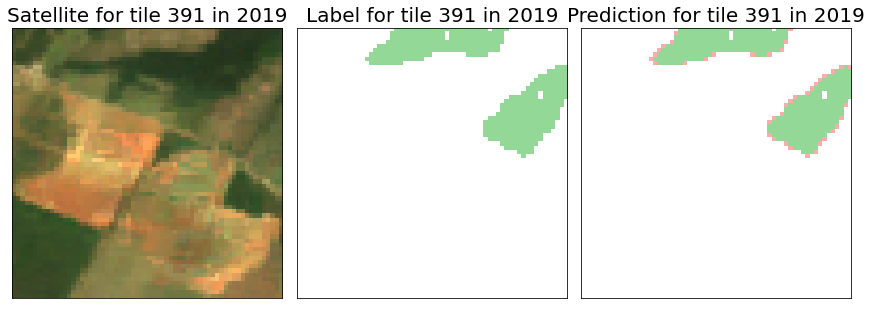

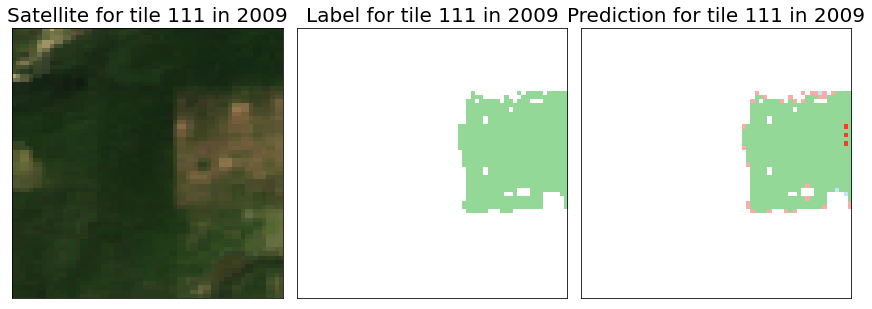

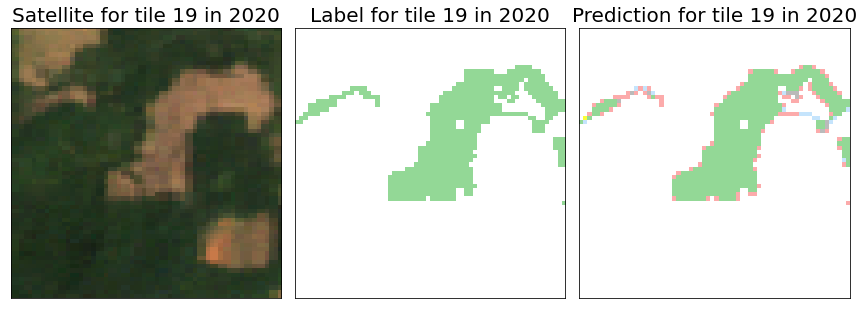

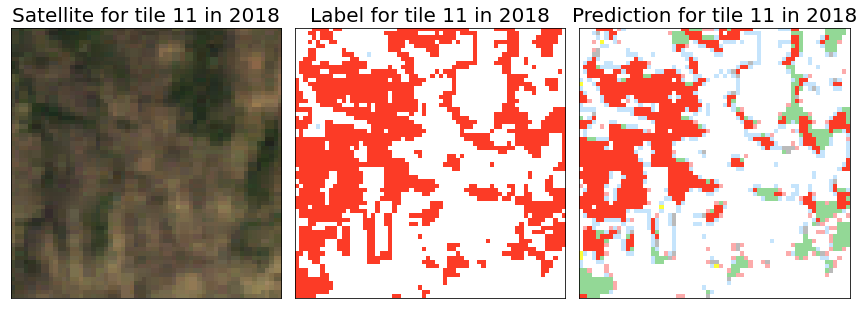

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


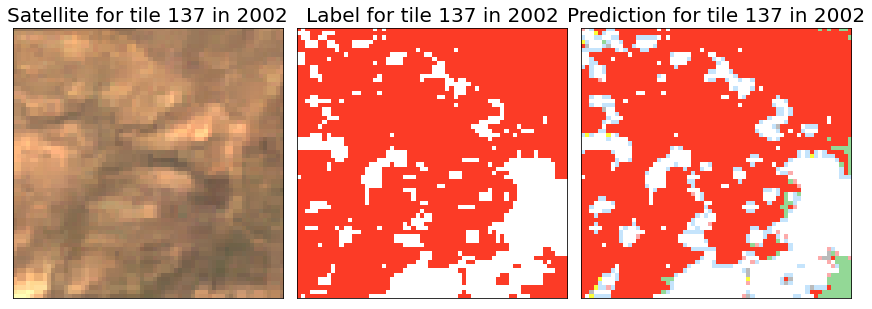

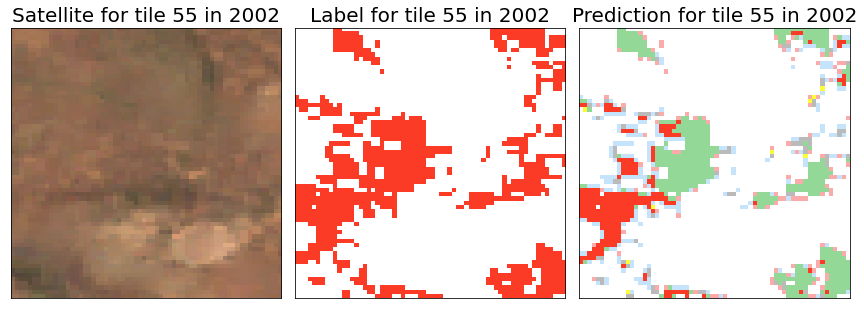

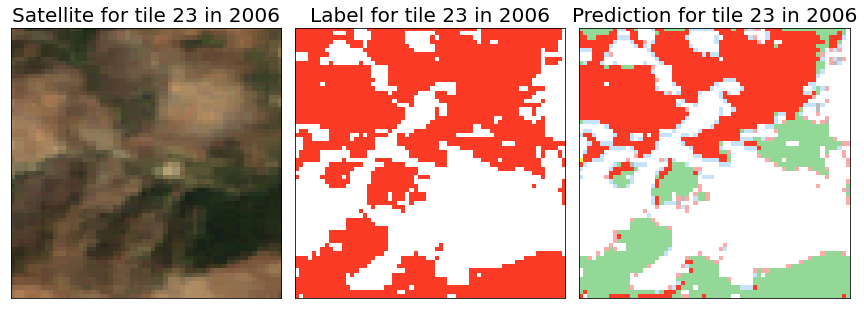

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


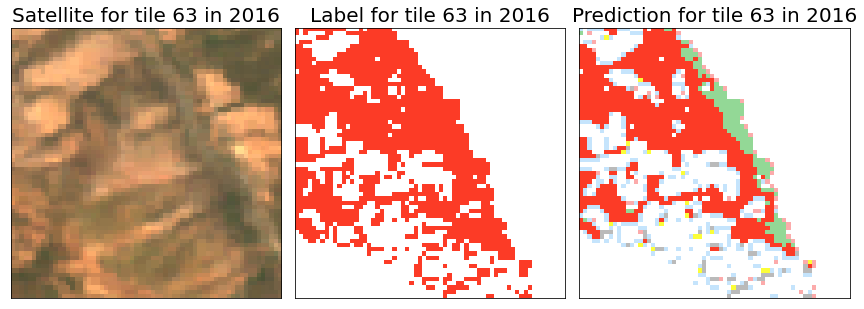

In [19]:
#Define training data and test data

seed = 42
random.seed = seed
np.random.seed = seed

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')

n_classes=8
n_features = 4
image_size = 64
batch_size=64
bands = 'all'#(1,5,6,7)

labelFilePath = 'inputs/labeledTilesValidYears/plot_{}_{}.tif'
bandFilePath = 'inputs/landsatTiles30pPostYear_4/Landsat7_{}_{}.tif'

fileNames = glob.glob('inputs/labeledTilesValidYears/*.tif')
fileNames.sort()

plotIDYears = [[int(x.split('_')[1]),int(x.split('_')[2].split('.')[0])] for x in fileNames]

plotIDS = np.unique([plotIDYears[i][0] for i in np.arange(len(plotIDYears))])
np.random.shuffle(plotIDS)


#Split into training and validation
trainingPlotIDs = plotIDS[:int(len(plotIDS)*0.7)]
validationPlotIDs = plotIDS[int(len(plotIDS)*0.7):]

trainingPlots = [x for x in plotIDYears if x[0] in trainingPlotIDs]
validationPlots = [x for x in plotIDYears if x[0] in validationPlotIDs]
print(len(trainingPlots), len(validationPlots))


#Model name to save
modelPath = 'unetModels/models'
modelName = 'unet_landsat'
runNum = 1
#Define if we want to reinialize a new model
newModel = False


# Define weights for classes!
classnames = ['No Loss','Hard commodities', 'Forest products', 'Other disturbances',
                'Soft commodities', 'Settlements/infrastructure', 'Fires','Hansen Mistake']
class_weights = np.array([2, 80, 60, 600,
                          600, 600, 500,600]).astype(float)


#Create new model
if newModel==True:
    model = Model(inputs=[inputs], outputs=[outputs])
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss=weighted_categorical_crossentropy(class_weights),
                  optimizer=optimizer,
                  metrics=[iou_coef])

# #Load model
else:
    model = keras.models.load_model(os.path.join(modelPath,'{}').format(modelName+str(runNum)), custom_objects = {"loss":weighted_categorical_crossentropy(class_weights),"iou_coef": iou_coef, "weighted_categorical_crossentropy": weighted_categorical_crossentropy(class_weights)})


#model.summary()

#Plot some results!

def NormalizeData(data):
    return data/0.15
    #return (data + 0.2)/(0.3-0.2)#(data - np.min(data)) / (np.max(data) - np.min(data))
classnames = ['No\nloss','Hard\ncommodities', 'Forest\nproducts', 'Other\ndisturbances',
                'Soft\ncommodities', 'Settlements/\ninfrastructure', 'Fires','Hansen\nmistake']
classcolors = ['#ffffff','#FCABAB','#93D896','#C5E4FC','#FBFD38','#BABABA','#FC3B26','#3540c8']


model = keras.models.load_model(os.path.join(modelPath,'{}').format(modelName+str(runNum)), custom_objects = {"loss":weighted_categorical_crossentropy(class_weights),"iou_coef": iou_coef, "weighted_categorical_crossentropy": weighted_categorical_crossentropy(class_weights)})



random.seed = seed
np.random.seed = seed
#ids = np.arange(len(validationPlots))#np.random.randint(0, high=len(validationPlots), size=len(validationPlots))#[1,2,3,5,7,9,10,200,300,200,40,20,150]

ids = [[199, 2010],[199, 2011],[235, 2007],[391, 2019],[111, 2009],
       [19, 2020],[11, 2018],[137, 2002],[55, 2002],[23, 2006],[63, 2016]]

#ids = [[51, 2014],[51, 2016],[71, 2019]]

for idy in ids:
    #validationID = validationPlots[idy]
    validationID = idy
    validationXRaw, label = read_image(validationID, labelFilePath, bandFilePath,bands=bands)
    validationX = np.zeros((1, image_size, image_size, n_features))
    validationX[0,:,:,:] = validationXRaw
    
    
    ynew = model.predict(tf.convert_to_tensor(validationX, np.float32))
    ynew = ynew[0]
    label = label[0]
    #ynew = np.argmax(ynew, axis=-1)

# #     ##Code block to filter to only loss
    ynew[:,:,0] = 0
    ynew = np.argmax(ynew,axis=-1)
    ynew = np.where(label==0, 0, ynew) 

    cmap = colors.ListedColormap(classcolors)
    bounds=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(12,6)) # two axes on figure

    X = np.zeros((64,64,3))
    X[:,:,0] = validationXRaw[:,:,1]
    X[:,:,1] = validationXRaw[:,:,2]
    X[:,:,2] = validationXRaw[:,:,3]
    X = NormalizeData(X)

    ax1.imshow(X, interpolation='none', aspect='auto')#vmin=0, vmax=num_classes,cmap='tab10')
    ax1.axes.xaxis.set_visible(False)
    ax1.axes.yaxis.set_visible(False)
    ax1.set_title('Satellite for tile {} in {}'.format(validationID[0],validationID[1]), fontsize=20)
    ax1.set_aspect('equal', adjustable='box')
    
    
    ax2.imshow(label,cmap=cmap, norm=norm)#,vmin=0, vmax=num_classes,cmap='tab10')
    ax2.axes.xaxis.set_visible(False)
    ax2.axes.yaxis.set_visible(False)
    ax2.set_title('Label for tile {} in {}'.format(validationID[0],validationID[1]), fontsize=20)
    
    ax3.axes.xaxis.set_visible(False)
    ax3.axes.yaxis.set_visible(False)
    ax3.imshow(ynew,cmap=cmap, norm=norm)#vmin=0, vmax=num_classes,cmap='tab10')
    ax3.set_title('Prediction for tile {} in {}'.format(validationID[0],validationID[1]), fontsize=20)

#     cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=[ax1,ax2,ax3],orientation='horizontal')
#     cbar.set_ticks([0,1,2,3,4,5,6,7])

#     cbar.set_ticklabels(classnames)

    plt.tight_layout()
    plt.show()
    
    fig1.savefig('/Users/kristine/Desktop/Viz/{}.png'.format(validationID), dpi=800)
    
    
#     labelValues, labelCounts = np.unique(label, return_counts=True)
#     predValues, predCounts = np.unique(ynew, return_counts=True)
#     print('Counts for L: ',dict(zip(labelValues, labelCounts)))
#     print('Counts for P: ',dict(zip(predValues, predCounts)))
#     print('Accuracy :',accuracy_score(label.flatten(), ynew.flatten()))
#     matrix = confusion_matrix(label.flatten(), ynew.flatten())
#     print('Accuracy by class: ',matrix.diagonal()/matrix.sum(axis=1))
#     #print('Confusion matrix for label {}: '.format(idy))
#     #print(classification_report(label.flatten(), ynew.flatten()))
    